# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

## Pra-pemrosesan

**Pra-pemrosesan merupakan langkah awal untuk melihat dan mengecek data sebelum dilakukan pemrosesan. Fungsinya adalah apakah data-data tersebut memiliki standar dan ketentuan yang dapat sudah tepat agar bisa dilakukan pemrosesan selanjutnya, dan apakah jika ada nilai hilang dan sebagainya itu dapat ditoleransi atau tidak yang juga penentu sebelum dilakukan pemrosesan.**

In [ ]:
# Muat semua library

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
# Memuat variabel yang membaca file

p3 = pd.read_csv('/datasets/vehicles_us.csv')

### Memuat Data

In [ ]:
# Muat file data menjadi DataFrame

p3

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [ ]:
# Melihat jumlah kolom dan baris

p3.shape

(51525, 13)

In [ ]:
# melihat distribusi data

p3.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


**Melihat sekilas dari data dan distribusinya bahwa didata ada beberapa nilai yang hilang / `nan` maka perlu melihat lebih jauh lagi apakah yang hilang ada disemua kolom atau tidak, apakah berpola hilangnya atau hanya acak saja.**

**Dan didistribusi data ada beberapa nilai yang cukup menarik seperti `price` yang memiliki nilai max sangat ekstrim dibanding mean dan mediannya yang membuat apakah itu data outlier karena harga itu adalah harga mobil mewah supercar atau hanya keisingan seseorang yang menaruh mobil biasa tetapi memberi harga yang ekstrim.**

**Pada kolom `cylinders` juga bahwa ada nilai yang lebih dari mean dan mediannya yaitu diatas 6. Apakah mobil yang dijual dengan mesin diatas silinder 6 adalah mobil mewah supercar menjadi outlier atau bukan.**

**Pada kolom `odometer` bahwa ada nilai yang pada max sangat ekstrim diatas mean dan median. Apakah itu outlier karena mobilnya sudah tua atau sering dipakai atau emang hanya input yang salah dari seorang penjual.**

**Pada kolom `days_listed` bahwa ada nilai yang pada max sangat ekstrim diatas mean dan median. Apakah itu outlier karena mobilnya tidak laku dijual selama sesuai hari yang ada atau sebenarnya sudah terjual tapi lupa untuk tidak mengurus postingannya untuk ditutup karena lupa.**

### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan 
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [ ]:
# tampilkan informasi/rangkuman umum tentang DataFrame

p3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
# tampilkan sampel data 15 pertama

p3.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [ ]:
# 15 sample data terakhir

p3.tail(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51510,4200,2011.0,ford focus,excellent,4.0,gas,76000.0,automatic,sedan,silver,NaN,2019-01-13,43
51511,21600,2016.0,chevrolet camaro lt coupe 2d,good,6.0,gas,19579.0,other,coupe,grey,NaN,2018-08-26,51
51512,7300,2013.0,nissan altima,excellent,6.0,gas,7100.0,automatic,sedan,black,NaN,2018-06-17,63
51513,17999,2014.0,ram 1500,like new,8.0,gas,154000.0,automatic,pickup,white,1.0,2018-06-21,11
51514,4800,2012.0,volkswagen jetta,good,4.0,gas,138000.0,automatic,sedan,silver,NaN,2018-07-19,39
51515,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51517,11000,2012.0,dodge charger,excellent,8.0,gas,81000.0,automatic,sedan,black,NaN,2019-04-19,44
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,NaN,2018-08-10,63
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


**Setelah melihat informasi umum dan data sampel, terdapat missing value. Dengan hipotesis bahwa missing value tersebut tidak memiliki pola-pola tertentu.**

In [ ]:
# Melihat distribusi value kolom 'condition'
p3['condition'].sort_values().unique()

array(['excellent', 'fair', 'good', 'like new', 'new', 'salvage'],
      dtype=object)

In [ ]:
# Melihat distribusi value kolom 'model'
p3['model'].sort_values().unique()

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-250 super duty', 'ford f-350 sd', 'ford f150',
       'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty',
       'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus

In [ ]:
# Melihat distribusi value kolom 'fuel'
p3['fuel'].sort_values().unique()

array(['diesel', 'electric', 'gas', 'hybrid', 'other'], dtype=object)

In [ ]:
# Melihat distribusi value kolom 'type'
p3['type'].sort_values().unique()

array(['SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van',
       'offroad', 'other', 'pickup', 'sedan', 'truck', 'van', 'wagon'],
      dtype=object)

In [ ]:
# Melihat distribusi value kolom 'paint_color'
p3['paint_color'].sort_values().unique()

array(['black', 'blue', 'brown', 'custom', 'green', 'grey', 'orange',
       'purple', 'red', 'silver', 'white', 'yellow', nan], dtype=object)

In [ ]:
# Melihat distribusi value kolom 'model_year'
p3['model_year'].sort_values().unique()

array([1908., 1929., 1936., 1948., 1949., 1954., 1955., 1958., 1960.,
       1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
       1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016., 2017., 2018., 2019.,   nan])

In [ ]:
# Melihat distribusi value kolom
p3['is_4wd'].sort_values().unique()

array([ 1., nan])

In [ ]:
p3['is_4wd']

0        1.0
1        1.0
2        NaN
3        NaN
4        NaN
        ... 
51520    NaN
51521    NaN
51522    NaN
51523    NaN
51524    NaN
Name: is_4wd, Length: 51525, dtype: float64

In [ ]:
p3['is_4wd'].isna()

0        False
1        False
2         True
3         True
4         True
         ...  
51520     True
51521     True
51522     True
51523     True
51524     True
Name: is_4wd, Length: 51525, dtype: bool

**Melihat values `nan` pada kolom `is_4wd` bahwa perlu mengisi nilai yang `nan` menjadi nilai `0`. karena tipe data ini adalah boolean.**

In [ ]:
# melihat kolom 'date_posted'
p3['date_posted']

0        2018-06-23
1        2018-10-19
2        2019-02-07
3        2019-03-22
4        2019-04-02
            ...    
51520    2018-10-03
51521    2018-11-14
51522    2018-11-15
51523    2018-07-02
51524    2018-06-05
Name: date_posted, Length: 51525, dtype: object

**Tipe datanya adalah `object`, padahal harusnya adalah `datatimes`. Maka perlu di ubah agar menjadi `datatimes`.**

In [ ]:
p3.isna().any()

price           False
model_year       True
model           False
condition       False
cylinders        True
fuel            False
odometer         True
transmission    False
type            False
paint_color      True
is_4wd           True
date_posted     False
days_listed     False
dtype: bool

**Melihat jumlah kolom yang mempunyai nilai hialng/nan sebanyak 5 kolom. Dan kolom yang mempunyai values yang hilang memiliki jumlah yang sama perlu pengecekan lebih lanjut apakah ada kemungkinan nilai itu berpola atau tidak.**

### Kesimpulan dan Langkah-Langkah Selanjutnya

In [ ]:
# melihat jenis mobil yang mempunyai nilai nan pada kolom 'model_year'
model_year_isna = p3.loc[p3['model_year'].isna()]
model_year_isna['model'].sort_values().unique()

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-250 super duty', 'ford f-350 sd', 'ford f150',
       'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty',
       'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus

**untuk kolom `model_year` yang mempunyai nilai `nan` dapat diisi, dengan ketentuan tambahan informasi dari jenis mobilnya atau harga yang coba ditawarkan oleh penjual. Karena 2 hal itu lah yang bisa menentukan model mobilnya tahun berapa dan itu merupakan informasi yang sangat umum dan mudah untuk mendapatkan gambaran model tahunnya.**

In [ ]:
# Memeriksa data yang mempunyai nilai `nan` di lima kolom tersebut
p3.loc[(p3['model_year'].isna()) & (p3['cylinders'].isna()) & (p3['odometer'].isna()) & (p3['paint_color'].isna()) & (p3['is_4wd'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
19877,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,NaN,NaN,2018-10-16,44
20969,3000,NaN,ford focus,like new,NaN,diesel,NaN,automatic,sedan,NaN,NaN,2018-10-24,15
23376,3500,NaN,toyota 4runner,excellent,NaN,gas,NaN,automatic,SUV,NaN,NaN,2019-03-28,57
43039,4200,NaN,ford fusion,excellent,NaN,gas,NaN,automatic,sedan,NaN,NaN,2019-01-10,11


In [ ]:
# Memeriksa nilai nan pada kolom model_year & cylinder
p3.loc[(p3['model_year'].isna()) & (p3['cylinders'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,NaN,2019-01-14,50
418,4998,NaN,toyota corolla,good,NaN,gas,44442.0,automatic,sedan,grey,NaN,2019-04-19,12
664,5000,NaN,toyota highlander,excellent,NaN,gas,NaN,automatic,SUV,blue,NaN,2018-06-27,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50643,21499,NaN,ram 2500,good,NaN,diesel,165831.0,manual,truck,red,1.0,2018-08-14,91
50836,39488,NaN,ford f350,like new,NaN,gas,32000.0,automatic,truck,NaN,1.0,2018-06-23,6
50924,1999,NaN,jeep grand cherokee laredo,good,NaN,gas,199312.0,automatic,SUV,blue,1.0,2019-01-05,69
51125,20900,NaN,ford f-150,excellent,NaN,gas,53209.0,automatic,pickup,NaN,1.0,2018-08-04,87


In [ ]:
# Memeriksa nilai nan pada kolom model_year & odometer
p3.loc[(p3['model_year'].isna()) & (p3['odometer'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,NaN,2018-05-13,57
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,NaN,2019-01-14,50
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,NaN,NaN,2018-08-09,29
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,NaN,NaN,2018-10-22,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,1.0,2018-05-10,35
51222,1000,NaN,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,NaN,2018-12-09,23
51257,6500,NaN,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,NaN,2018-10-16,75
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,NaN,2019-03-16,83


In [ ]:
# Memeriksa nilai nan pada kolom model_year & paint_color
p3.loc[(p3['model_year'].isna()) & (p3['paint_color'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,NaN,2018-06-16,34
165,22000,NaN,ford f350 super duty,good,8.0,diesel,163000.0,automatic,truck,NaN,1.0,2019-02-05,38
397,14995,NaN,chevrolet camaro,excellent,8.0,gas,95000.0,automatic,coupe,NaN,NaN,2018-06-29,15
443,2025,NaN,chevrolet tahoe,good,8.0,gas,151000.0,automatic,SUV,NaN,1.0,2018-10-24,31
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,NaN,NaN,2018-08-09,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51312,1800,NaN,hyundai santa fe,good,6.0,gas,287000.0,automatic,SUV,NaN,NaN,2018-12-13,100
51339,19890,NaN,toyota tundra,excellent,8.0,gas,127405.0,automatic,truck,NaN,1.0,2019-02-02,69
51385,3495,NaN,jeep liberty,good,6.0,gas,129644.0,automatic,wagon,NaN,1.0,2018-08-22,28
51396,14995,NaN,ford f-150,good,8.0,gas,123676.0,automatic,truck,NaN,1.0,2018-07-12,13


In [ ]:
# Memeriksa nilai nan pada kolom model_year & is_4wd
p3.loc[(p3['model_year'].isna()) & (p3['is_4wd'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
84,4995,NaN,hyundai elantra,like new,4.0,gas,151223.0,automatic,sedan,custom,NaN,2018-09-15,1
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,NaN,2018-06-16,34
164,2500,NaN,toyota camry,good,6.0,gas,150000.0,automatic,sedan,silver,NaN,2018-06-13,68
186,3000,NaN,honda accord,good,6.0,gas,204000.0,automatic,coupe,blue,NaN,2018-05-18,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51357,7995,NaN,toyota prius,excellent,4.0,hybrid,106250.0,automatic,hatchback,red,NaN,2019-01-28,24
51378,5495,NaN,honda civic,excellent,4.0,gas,130000.0,automatic,sedan,brown,NaN,2018-06-17,47
51399,4400,NaN,kia sorento,excellent,6.0,gas,NaN,automatic,SUV,silver,NaN,2018-08-21,23
51411,7995,NaN,ford taurus,excellent,6.0,gas,149462.0,automatic,sedan,silver,NaN,2018-09-16,86


In [ ]:
# Memeriksa nilai nan pada kolom cylinders & odometer
p3.loc[(p3['cylinders'].isna()) & (p3['odometer'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
119,14800,2016.0,kia sorento,like new,NaN,gas,NaN,automatic,SUV,brown,NaN,2019-02-27,93
126,25900,2012.0,chevrolet silverado 1500 crew,good,NaN,other,NaN,other,pickup,NaN,1.0,2018-08-31,44
135,28000,2016.0,ford mustang gt coupe 2d,good,NaN,gas,NaN,other,coupe,black,NaN,2018-11-20,28
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
346,2999,2003.0,ford focus,good,NaN,gas,NaN,automatic,sedan,red,NaN,2018-11-30,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51324,18995,2018.0,dodge grand caravan,new,NaN,gas,NaN,automatic,mini-van,grey,NaN,2018-06-20,60
51330,4199,2007.0,toyota camry le,good,NaN,gas,NaN,automatic,sedan,grey,NaN,2018-06-03,5
51406,7495,2010.0,chevrolet equinox,good,NaN,gas,NaN,automatic,wagon,black,NaN,2019-04-19,34
51410,9300,2016.0,ford focus,excellent,NaN,gas,NaN,automatic,sedan,silver,NaN,2018-09-24,53


In [ ]:
# Memeriksa nilai nan pada kolom cylinders & paint_color
p3.loc[(p3['cylinders'].isna()) & (p3['paint_color'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
75,6950,2005.0,chevrolet tahoe,excellent,NaN,gas,186021.0,automatic,SUV,NaN,1.0,2018-10-30,3
126,25900,2012.0,chevrolet silverado 1500 crew,good,NaN,other,NaN,other,pickup,NaN,1.0,2018-08-31,44
283,6995,2004.0,toyota tundra,good,NaN,gas,224000.0,automatic,truck,NaN,1.0,2018-09-04,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51340,17990,2016.0,gmc acadia,excellent,NaN,gas,62171.0,automatic,SUV,NaN,1.0,2019-03-09,5
51369,19750,2017.0,chevrolet traverse,excellent,NaN,gas,47750.0,automatic,SUV,NaN,NaN,2018-06-14,26
51402,22000,2003.0,chevrolet silverado 2500hd,excellent,NaN,gas,53000.0,automatic,pickup,NaN,1.0,2018-10-13,27
51404,9995,2009.0,honda odyssey,good,NaN,gas,68768.0,automatic,van,NaN,NaN,2018-07-13,51


In [ ]:
# Memeriksa nilai nan pada kolom cylinders & is_4wd
p3.loc[(p3['cylinders'].isna()) & (p3['is_4wd'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
119,14800,2016.0,kia sorento,like new,NaN,gas,NaN,automatic,SUV,brown,NaN,2019-02-27,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51410,9300,2016.0,ford focus,excellent,NaN,gas,NaN,automatic,sedan,silver,NaN,2018-09-24,53
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


In [ ]:
# Memeriksa nilai nan pada kolom odometer & paint_color
p3.loc[(p3['odometer'].isna()) & (p3['paint_color'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
38,7999,2015.0,chrysler 200,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2019-03-08,29
126,25900,2012.0,chevrolet silverado 1500 crew,good,NaN,other,NaN,other,pickup,NaN,1.0,2018-08-31,44
196,10997,2014.0,ford escape,excellent,4.0,gas,NaN,automatic,wagon,NaN,1.0,2018-11-17,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51452,5495,2003.0,chevrolet silverado 1500,excellent,8.0,gas,NaN,automatic,pickup,NaN,1.0,2019-01-14,34
51474,7980,2003.0,bmw x5,excellent,6.0,gas,NaN,automatic,SUV,NaN,1.0,2019-01-28,53
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [ ]:
# Memeriksa nilai nan pada kolom odometer & is_4wd
p3.loc[(p3['odometer'].isna()) & (p3['is_4wd'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
29,5495,2010.0,chevrolet impala,excellent,6.0,gas,NaN,automatic,sedan,white,NaN,2019-02-18,20
38,7999,2015.0,chrysler 200,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2019-03-08,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51470,22000,2004.0,ram 1500,like new,8.0,gas,NaN,automatic,truck,silver,NaN,2019-03-22,33
51472,3900,2003.0,chrysler town & country,excellent,6.0,gas,NaN,automatic,van,silver,NaN,2019-01-16,64
51486,5895,2009.0,hyundai santa fe,excellent,NaN,gas,NaN,automatic,other,blue,NaN,2018-06-30,44
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [ ]:
# Memeriksa nilai nan pada kolom paint_color & is_4wd
p3.loc[(p3['paint_color'].isna()) & (p3['is_4wd'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
31,11999,2017.0,toyota camry le,excellent,4.0,gas,35721.0,automatic,sedan,NaN,NaN,2018-09-13,25
34,9500,2008.0,toyota highlander,good,6.0,gas,149799.0,automatic,SUV,NaN,NaN,2018-06-04,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51484,7999,2010.0,chevrolet traverse,excellent,6.0,gas,109363.0,automatic,SUV,NaN,NaN,2018-12-15,25
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [ ]:
# Memeriksa nilai nan pada kolom model_year, cylinders & odometer
p3.loc[(p3['model_year'].isna()) & (p3['cylinders'].isna()) & (p3['odometer'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,NaN,2019-01-14,50
664,5000,NaN,toyota highlander,excellent,NaN,gas,NaN,automatic,SUV,blue,NaN,2018-06-27,14
753,18900,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,truck,blue,1.0,2018-08-22,85
1306,2500,NaN,honda accord,good,NaN,gas,NaN,automatic,sedan,red,NaN,2018-08-28,76
1566,7400,NaN,toyota corolla,like new,NaN,gas,NaN,automatic,sedan,grey,NaN,2019-03-10,15
2344,33950,NaN,ford f-250,good,NaN,diesel,NaN,automatic,pickup,white,1.0,2018-11-22,50
5303,5999,NaN,toyota rav4,good,NaN,gas,NaN,automatic,SUV,silver,1.0,2018-12-27,14
6639,3000,NaN,toyota highlander,good,NaN,gas,NaN,automatic,SUV,green,NaN,2018-05-20,36
6752,6500,NaN,honda accord,good,NaN,gas,NaN,automatic,sedan,black,NaN,2018-08-28,9


In [ ]:
# Memeriksa nilai nan pada kolom model_year, cylinders & paint_color
p3.loc[(p3['model_year'].isna()) & (p3['cylinders'].isna()) & (p3['paint_color'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
5965,1495,NaN,ford f-150,excellent,NaN,gas,109194.0,automatic,pickup,NaN,NaN,2019-01-03,56
11347,17299,NaN,jeep grand cherokee,good,NaN,gas,62666.0,automatic,other,NaN,1.0,2019-03-02,38
11552,1700,NaN,ford taurus,good,NaN,gas,184264.0,automatic,sedan,NaN,NaN,2018-10-09,21
11767,1,NaN,ford f-150,excellent,NaN,gas,26265.0,automatic,truck,NaN,1.0,2018-08-03,30
12784,14695,NaN,ford econoline,good,NaN,gas,126000.0,automatic,van,NaN,NaN,2019-03-09,27
13135,19500,NaN,chevrolet camaro lt coupe 2d,good,NaN,gas,16684.0,other,coupe,NaN,NaN,2018-12-17,23
14298,3000,NaN,nissan altima,good,NaN,gas,109000.0,automatic,coupe,NaN,NaN,2018-10-28,67
14342,24200,NaN,nissan frontier crew cab sv,good,NaN,gas,11034.0,other,pickup,NaN,1.0,2018-05-10,84
14510,15995,NaN,chevrolet malibu,excellent,NaN,gas,42000.0,automatic,sedan,NaN,NaN,2018-09-08,82
14587,24000,NaN,ford f-150,excellent,NaN,gas,84000.0,automatic,truck,NaN,NaN,2019-02-16,33


In [ ]:
# Memeriksa nilai nan pada kolom model_year, cylinders & is_4wd
p3.loc[(p3['model_year'].isna()) & (p3['cylinders'].isna()) & (p3['is_4wd'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,NaN,2019-01-14,50
418,4998,NaN,toyota corolla,good,NaN,gas,44442.0,automatic,sedan,grey,NaN,2019-04-19,12
664,5000,NaN,toyota highlander,excellent,NaN,gas,NaN,automatic,SUV,blue,NaN,2018-06-27,14
691,5495,NaN,honda accord,like new,NaN,gas,134000.0,automatic,sedan,brown,NaN,2019-03-24,55
1184,28100,NaN,ford mustang gt coupe 2d,good,NaN,gas,22417.0,automatic,coupe,black,NaN,2019-02-20,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49496,4950,NaN,chevrolet cruze,good,NaN,gas,93000.0,automatic,sedan,NaN,NaN,2019-04-14,35
49516,11500,NaN,jeep grand cherokee,excellent,NaN,gas,137591.0,automatic,SUV,black,NaN,2018-06-21,65
49628,9999,NaN,chevrolet corvette,excellent,NaN,gas,87383.0,manual,coupe,red,NaN,2018-12-20,50
49676,6495,NaN,ford f-250 sd,good,NaN,gas,158830.0,automatic,truck,grey,NaN,2018-09-10,27


In [ ]:
# Memeriksa nilai nan pada kolom model_year, cylinders, odometer & paint_color
p3.loc[(p3['model_year'].isna()) & (p3['cylinders'].isna()) & (p3['odometer'].isna()) & (p3['paint_color'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
19877,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,NaN,NaN,2018-10-16,44
20662,7795,NaN,kia sorento,good,NaN,gas,NaN,automatic,SUV,NaN,1.0,2019-01-11,108
20969,3000,NaN,ford focus,like new,NaN,diesel,NaN,automatic,sedan,NaN,NaN,2018-10-24,15
23376,3500,NaN,toyota 4runner,excellent,NaN,gas,NaN,automatic,SUV,NaN,NaN,2019-03-28,57
37761,17995,NaN,ram 1500,excellent,NaN,gas,NaN,automatic,pickup,NaN,1.0,2019-02-25,28
43039,4200,NaN,ford fusion,excellent,NaN,gas,NaN,automatic,sedan,NaN,NaN,2019-01-10,11
44707,23586,NaN,ford edge,like new,NaN,gas,NaN,automatic,SUV,NaN,1.0,2018-05-05,44
44904,13995,NaN,gmc yukon,good,NaN,hybrid,NaN,automatic,SUV,NaN,1.0,2018-05-08,19
47139,12500,NaN,chevrolet traverse,good,NaN,gas,NaN,automatic,SUV,NaN,1.0,2018-06-22,35


In [ ]:
# Memeriksa nilai nan pada kolom model_year, cylinders, odometer & is_4wd
p3.loc[(p3['model_year'].isna()) & (p3['cylinders'].isna()) & (p3['odometer'].isna()) & (p3['is_4wd'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,NaN,2019-01-14,50
664,5000,NaN,toyota highlander,excellent,NaN,gas,NaN,automatic,SUV,blue,NaN,2018-06-27,14
1306,2500,NaN,honda accord,good,NaN,gas,NaN,automatic,sedan,red,NaN,2018-08-28,76
1566,7400,NaN,toyota corolla,like new,NaN,gas,NaN,automatic,sedan,grey,NaN,2019-03-10,15
6639,3000,NaN,toyota highlander,good,NaN,gas,NaN,automatic,SUV,green,NaN,2018-05-20,36
6752,6500,NaN,honda accord,good,NaN,gas,NaN,automatic,sedan,black,NaN,2018-08-28,9
17041,24600,NaN,ford mustang gt coupe 2d,good,NaN,gas,NaN,other,coupe,white,NaN,2018-10-22,10
17282,6650,NaN,nissan maxima,like new,NaN,gas,NaN,automatic,sedan,red,NaN,2019-01-27,89
19877,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,NaN,NaN,2018-10-16,44
20420,2400,NaN,honda odyssey,good,NaN,gas,NaN,automatic,mini-van,brown,NaN,2018-09-15,10


**Melihat jumlah kolom yang mempunyai nilai hialng/nan sebanyak 5 kolom. Dan kolom yang mempunyai values yang hilang memiliki jumlah yang sama semua hanya ada beberapa, jadi dapat disimpulkan bahwa nilai hilang tidak berpola atau hanya acak saja.**

In [ ]:
# Melihat presentase kehilang data untuk masing-masing kolom
total_isna = p3.isna().sum() / len(p3) * 100
total_isna

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

**Semua Data yang hilang masih bisa di toleransi, untuk kolom `is_4wd` karena tidak ada nilai 0 nya maka kemungkinan ada kesalahan dalam sistemnya, jadi bisa di ubah dari nilai `nan` menjadi `0`.**

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

In [ ]:
# Mengecek nilai yang paling sering keluar pada kolom 'model_year'
p3['model_year'].mode()

0    2013.0
dtype: float64

In [ ]:
# Mengisi nilai yang hilang pada kolom `model_year`

def data_imputation1(p3, column_grouping, column_selected):
    group = p3[column_grouping].unique()
    for rule in group:
        modus = p3.loc[(p3[column_grouping]==rule) & ~(p3[column_selected].isna()), column_selected].mode()[0]
        p3[column_selected] = p3[column_selected].fillna(modus)
    return p3

In [ ]:
p3['model_year'] = data_imputation1(p3, column_grouping='model', column_selected='model_year')['model_year']

**Digunakan modus untuk mengisi nilai `model_year` karena tahun model yang diiklankan paling banyak pada mobil yang dijual**

In [ ]:
# Mengecek jumlah nilai yang hilang apakah masih ada atau sudah tidak ada
p3['model_year'].isna().sum()

0

In [ ]:
p3.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2012.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [ ]:
# Mengisi nilai yang hilang pada kolom `is_4wd`
p3['is_4wd'] = p3['is_4wd'].fillna(0)

In [ ]:
p3.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2012.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [ ]:
# Mengecek jumlah nilai yang hilang apakah masih ada atau sudah tidak ada
p3['is_4wd'].isna().sum()

0

In [ ]:
# Mengisi nilai yang hilang pada kolom `paint_color`
p3.loc[p3['paint_color'].isna(), 'paint_color'] = 'others'

In [ ]:
p3.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,others,1.0,2018-06-23,19
1,25500,2012.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,others,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,others,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [ ]:
# Mengubah nilai kosong pada kolom 'odometer'

p3['odometer'] = p3['odometer'].fillna(p3['odometer'].median())

**Mengisi nilai yang hilang pada `odometer` dengan menggunakan nilai median. Selain nilainya tidak jauh dari mean, nilai median jauh lebih rapih dibanding median yang dimana akan berfungsi lebih baik pada proses selanjutnya ketika dibutuhkan data untuk kolom `odometer`.**

In [ ]:
# Mengecek jumlah nilai yang hilang apakah masih ada atau sudah tidak ada
p3['odometer'].isna().sum()

0

In [ ]:
p3.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,others,1.0,2018-06-23,19
1,25500,2012.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,others,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,others,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [ ]:
# Mengecek nilai yang paling sering keluar pada kolom 'clyinders'
p3['cylinders'].mode()

0    8.0
dtype: float64

In [ ]:
# Mengisi nilai yang hilang pada kolom `cylinders`

def data_imputation1(p3, column_grouping, column_selected):
    group = p3[column_grouping].unique()
    for rule in group:
        modus = p3.loc[(p3[column_grouping]==rule) & ~(p3[column_selected].isna()), column_selected].mode()[0]
        p3[column_selected] = p3[column_selected].fillna(modus)
    return p3

In [ ]:
p3['cylinders'] = data_imputation1(p3, column_grouping='model', column_selected='cylinders')['cylinders']

In [ ]:
# Mengecek jumlah nilai yang hilang apakah masih ada atau sudah tidak ada
p3['cylinders'].isna().sum()

0

In [ ]:
p3.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,others,1.0,2018-06-23,19
1,25500,2012.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,others,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,others,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


## Memperbaiki Tipe Data

In [ ]:
# Mengcek tipe data sebelum diganti
p3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
# mengubah tipe data pada kolom 'date_posted'
p3['date_posted'] = pd.to_datetime(p3['date_posted'], format='%Y-%m-%d')

In [ ]:
# melihat kembali tipe data kolom 'date_posted' setelah mengubahnya apakah berubah atau tidak
p3['date_posted']

0       2018-06-23
1       2018-10-19
2       2019-02-07
3       2019-03-22
4       2019-04-02
           ...    
51520   2018-10-03
51521   2018-11-14
51522   2018-11-15
51523   2018-07-02
51524   2018-06-05
Name: date_posted, Length: 51525, dtype: datetime64[ns]

In [ ]:
# mengubah tipe data pada kolom 'is_4wd' menjadi boolean
p3['is_4wd'] = p3['is_4wd'].astype('bool')

In [ ]:
# mengecek data dan tipe datanya pada kolom 'is_4wd'
p3['is_4wd']

0         True
1         True
2        False
3        False
4        False
         ...  
51520    False
51521    False
51522    False
51523    False
51524    False
Name: is_4wd, Length: 51525, dtype: bool

In [ ]:
# mengubah tipe data pada kolom 'model_year' menjadi int
p3['model_year'] = p3['model_year'].astype('int')

In [ ]:
# mengecek data dan tipe datanya pada kolom 'model_year'
p3['model_year']

0        2011
1        2012
2        2013
3        2003
4        2017
         ... 
51520    2013
51521    2002
51522    2009
51523    2013
51524    2014
Name: model_year, Length: 51525, dtype: int64

In [ ]:
# mengubah tipe data pada kolom 'cylinders' menjadi int
p3['cylinders'] = p3['cylinders'].astype('int')

In [ ]:
# mengecek data dan tipe datanya pada kolom 'cylinders'
p3['cylinders']

0        6
1        6
2        4
3        8
4        4
        ..
51520    6
51521    4
51522    4
51523    4
51524    4
Name: cylinders, Length: 51525, dtype: int64

In [ ]:
# Mengcek tipe data sesudah diganti
p3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 4.8+ MB


## Memperbaiki Kualitas Data

In [ ]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan
# mengubah data pada kolom 'days_listed' menjadi datatime
p3['days_listed'] = pd.to_timedelta(p3['days_listed'], unit='D')

In [ ]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan
p3['days_update'] = p3['date_posted'] + p3['days_listed']

In [ ]:
p3.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_update
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,others,True,2018-06-23,19 days,2018-07-12
1,25500,2012,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50 days,2018-12-08
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79 days,2019-04-27
3,1500,2003,ford f-150,fair,8,gas,113000.0,automatic,pickup,others,False,2019-03-22,9 days,2019-03-31
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28 days,2019-04-30
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15 days,2018-07-05
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73 days,2019-03-10
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68 days,2019-03-16
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,others,True,2018-07-16,19 days,2018-08-04
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17 days,2019-03-04


In [ ]:
# Tambahkan usia kendaraan saat iklan ditayangkan
# Membuat kolom yang berisikan tahun pada tanggal diiklan list mobil
p3['years_car_posted'] = p3['date_posted'].dt.year

In [ ]:
# Tambahkan usia kendaraan saat iklan ditayangkan
p3['age_of_car'] = (p3['years_car_posted'] - p3['model_year']) + 1

In [ ]:
p3.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_update,years_car_posted,age_of_car
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,others,True,2018-06-23,19 days,2018-07-12,2018,8
1,25500,2012,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50 days,2018-12-08,2018,7
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79 days,2019-04-27,2019,7
3,1500,2003,ford f-150,fair,8,gas,113000.0,automatic,pickup,others,False,2019-03-22,9 days,2019-03-31,2019,17
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28 days,2019-04-30,2019,3
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15 days,2018-07-05,2018,5
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73 days,2019-03-10,2018,4
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68 days,2019-03-16,2019,7
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,others,True,2018-07-16,19 days,2018-08-04,2018,7
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17 days,2019-03-04,2019,12


In [ ]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun
p3['avg_miles'] = p3['odometer'] / p3['age_of_car']

In [ ]:
p3.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_update,years_car_posted,age_of_car,avg_miles
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,others,True,2018-06-23,19 days,2018-07-12,2018,8,18125.000000
1,25500,2012,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50 days,2018-12-08,2018,7,12672.142857
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79 days,2019-04-27,2019,7,15714.285714
3,1500,2003,ford f-150,fair,8,gas,113000.0,automatic,pickup,others,False,2019-03-22,9 days,2019-03-31,2019,17,6647.058824
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28 days,2019-04-30,2019,3,26967.666667
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15 days,2018-07-05,2018,5,11590.800000
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73 days,2019-03-10,2018,4,19803.000000
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68 days,2019-03-16,2019,7,15639.000000
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,others,True,2018-07-16,19 days,2018-08-04,2018,7,14882.000000
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17 days,2019-03-04,2019,12,12265.916667


In [ ]:
p3['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [ ]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah

kategori_car = p3['condition']

def kategori_kondisi (kategori_car):
    if kategori_car == 'new':
        return 5
    elif kategori_car == 'like new':
        return 4
    elif kategori_car == 'excellent':
        return 3
    elif kategori_car == 'good':
        return 2
    elif kategori_car == 'fair':
        return 1
    else:
        return 0

In [ ]:
# Menggunakan fungsi untuk membuat kolom yang memanipulasi pada kolom 'condition'
p3['category_car'] = p3['condition'].apply(kategori_kondisi)

In [ ]:
p3.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_update,years_car_posted,age_of_car,avg_miles,category_car
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,others,True,2018-06-23,19 days,2018-07-12,2018,8,18125.000000,2
1,25500,2012,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50 days,2018-12-08,2018,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79 days,2019-04-27,2019,7,15714.285714,4
3,1500,2003,ford f-150,fair,8,gas,113000.0,automatic,pickup,others,False,2019-03-22,9 days,2019-03-31,2019,17,6647.058824,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28 days,2019-04-30,2019,3,26967.666667,3
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15 days,2018-07-05,2018,5,11590.800000,3
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73 days,2019-03-10,2018,4,19803.000000,3
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68 days,2019-03-16,2019,7,15639.000000,3
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,others,True,2018-07-16,19 days,2018-08-04,2018,7,14882.000000,3
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17 days,2019-03-04,2019,12,12265.916667,3


## Memeriksa Data yang Sudah Bersih

In [ ]:
# tampilkan informasi/rangkuman umum tentang DataFrame

p3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   price             51525 non-null  int64          
 1   model_year        51525 non-null  int64          
 2   model             51525 non-null  object         
 3   condition         51525 non-null  object         
 4   cylinders         51525 non-null  int64          
 5   fuel              51525 non-null  object         
 6   odometer          51525 non-null  float64        
 7   transmission      51525 non-null  object         
 8   type              51525 non-null  object         
 9   paint_color       51525 non-null  object         
 10  is_4wd            51525 non-null  bool           
 11  date_posted       51525 non-null  datetime64[ns] 
 12  days_listed       51525 non-null  timedelta64[ns]
 13  days_update       51525 non-null  datetime64[ns] 
 14  years_

In [ ]:
p3.describe()

,price,model_year,cylinders,odometer,days_listed,years_car_posted,age_of_car,avg_miles,category_car
count,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.908472,6.112450,115162.352179,39 days 13:18:51.248908297,2018.307462,9.398991,15673.862503,2.637535
std,10040.803015,6.084642,1.573784,59909.264385,28 days 04:54:08.916817944,0.461447,6.098532,12378.253203,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0 days 00:00:00,2018.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,79181.000000,19 days 00:00:00,2018.000000,5.000000,9416.666667,2.000000
50%,9000.000000,2011.000000,6.000000,113000.000000,33 days 00:00:00,2018.000000,8.000000,13387.714286,3.000000
75%,16839.000000,2014.000000,8.000000,146541.000000,53 days 00:00:00,2019.000000,13.000000,18589.000000,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271 days 00:00:00,2019.000000,111.000000,373200.000000,5.000000


In [ ]:
# tampilkan sampel data
p3.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_update,years_car_posted,age_of_car,avg_miles,category_car
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,others,True,2018-06-23,19 days,2018-07-12,2018,8,18125.000000,2
1,25500,2012,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50 days,2018-12-08,2018,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79 days,2019-04-27,2019,7,15714.285714,4
3,1500,2003,ford f-150,fair,8,gas,113000.0,automatic,pickup,others,False,2019-03-22,9 days,2019-03-31,2019,17,6647.058824,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28 days,2019-04-30,2019,3,26967.666667,3
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15 days,2018-07-05,2018,5,11590.800000,3
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73 days,2019-03-10,2018,4,19803.000000,3
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68 days,2019-03-16,2019,7,15639.000000,3
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,others,True,2018-07-16,19 days,2018-08-04,2018,7,14882.000000,3
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17 days,2019-03-04,2019,12,12265.916667,3


In [ ]:
p3.tail(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_update,years_car_posted,age_of_car,avg_miles,category_car
51510,4200,2011,ford focus,excellent,4,gas,76000.0,automatic,sedan,silver,False,2019-01-13,43 days,2019-02-25,2019,9,8444.444444,3
51511,21600,2016,chevrolet camaro lt coupe 2d,good,6,gas,19579.0,other,coupe,grey,False,2018-08-26,51 days,2018-10-16,2018,3,6526.333333,2
51512,7300,2013,nissan altima,excellent,6,gas,7100.0,automatic,sedan,black,False,2018-06-17,63 days,2018-08-19,2018,6,1183.333333,3
51513,17999,2014,ram 1500,like new,8,gas,154000.0,automatic,pickup,white,True,2018-06-21,11 days,2018-07-02,2018,5,30800.000000,4
51514,4800,2012,volkswagen jetta,good,4,gas,138000.0,automatic,sedan,silver,False,2018-07-19,39 days,2018-08-27,2018,7,19714.285714,2
51515,12000,2005,chevrolet silverado 2500hd,good,8,diesel,228000.0,automatic,pickup,silver,True,2018-08-18,52 days,2018-10-09,2018,14,16285.714286,2
51516,8999,2011,jeep grand cherokee,good,6,gas,113000.0,automatic,SUV,white,True,2018-11-01,51 days,2018-12-22,2018,8,14125.000000,2
51517,11000,2012,dodge charger,excellent,8,gas,81000.0,automatic,sedan,black,False,2019-04-19,44 days,2019-06-02,2019,8,10125.000000,3
51518,3750,2005,ford taurus,excellent,6,gas,110200.0,automatic,sedan,silver,False,2018-08-10,63 days,2018-10-12,2018,14,7871.428571,3
51519,11750,2015,honda accord,excellent,4,gas,113000.0,automatic,coupe,others,False,2018-11-24,89 days,2019-02-21,2018,4,28250.000000,3


In [ ]:
p3.sample(frac=0.25)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_update,years_car_posted,age_of_car,avg_miles,category_car
17413,5500,2012,ford escape,excellent,4,gas,113000.0,automatic,SUV,grey,False,2018-08-11,9 days,2018-08-20,2018,7,16142.857143,3
14305,1,2012,jeep wrangler,excellent,6,gas,79922.0,automatic,SUV,white,True,2018-09-22,26 days,2018-10-18,2018,7,11417.428571,3
28067,26900,2018,ford f-150,like new,6,gas,32000.0,automatic,pickup,red,True,2018-10-21,63 days,2018-12-23,2018,1,32000.000000,4
43843,5799,2011,ford escape,good,4,gas,126072.0,automatic,wagon,white,True,2018-06-07,103 days,2018-09-18,2018,8,15759.000000,2
37814,12677,2015,jeep cherokee,excellent,4,gas,47000.0,automatic,SUV,red,False,2019-03-04,18 days,2019-03-22,2019,5,9400.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9111,5900,2007,toyota camry le,excellent,4,gas,98.0,automatic,SUV,others,False,2018-07-02,71 days,2018-09-11,2018,12,8.166667,3
23531,1500,2012,ram 1500,fair,8,gas,113000.0,automatic,truck,others,True,2019-02-25,14 days,2019-03-11,2019,8,14125.000000,1
47967,5900,2006,jeep liberty,excellent,6,gas,126606.0,automatic,SUV,white,True,2019-03-11,33 days,2019-04-13,2019,14,9043.285714,3
33995,22900,2015,ram 1500,good,8,gas,134360.0,automatic,truck,white,True,2018-09-21,16 days,2018-10-07,2018,4,33590.000000,2


## Mempelajari Parameter Inti

Parameternya adalah
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder
- Kondisi

In [ ]:
p3.describe()

,price,model_year,cylinders,odometer,days_listed,years_car_posted,age_of_car,avg_miles,category_car
count,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.908472,6.112450,115162.352179,39 days 13:18:51.248908297,2018.307462,9.398991,15673.862503,2.637535
std,10040.803015,6.084642,1.573784,59909.264385,28 days 04:54:08.916817944,0.461447,6.098532,12378.253203,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0 days 00:00:00,2018.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,79181.000000,19 days 00:00:00,2018.000000,5.000000,9416.666667,2.000000
50%,9000.000000,2011.000000,6.000000,113000.000000,33 days 00:00:00,2018.000000,8.000000,13387.714286,3.000000
75%,16839.000000,2014.000000,8.000000,146541.000000,53 days 00:00:00,2019.000000,13.000000,18589.000000,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271 days 00:00:00,2019.000000,111.000000,373200.000000,5.000000


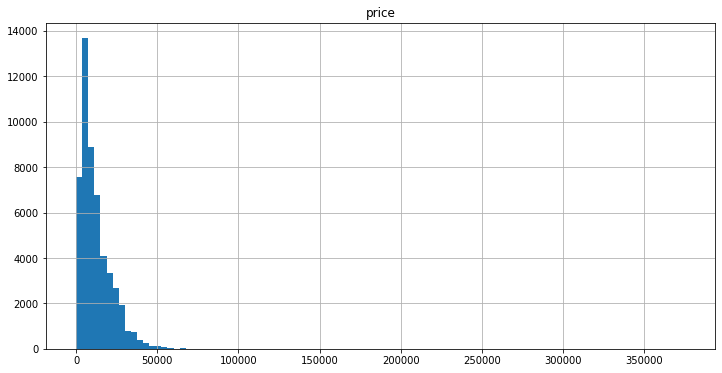

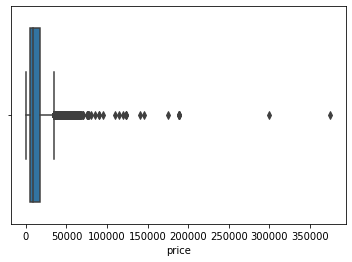

In [ ]:
# Membuat dan melihat histogram dan boxplot untuk outlier-nya pada kolom 'price'

p3.hist('price', bins=100, figsize=(12,6))
plt.show()
sns.boxplot(x='price', data=p3)
plt.show()

**Melihat Dari Boxplot dan Histogram bahwa pada kolom `price` memiliki nilai outlier yang sampai pada angka lebih dari 350.000 (lebih tepatnya 375.000 pada kolom describe yang merupakan nilai max). Nilai outliernya merupakan nilai positif yang artinya ini condong ke atas atau ke kanan. Tetapi disribusi datanya terbilang normal karena bentuk histogramnya.**

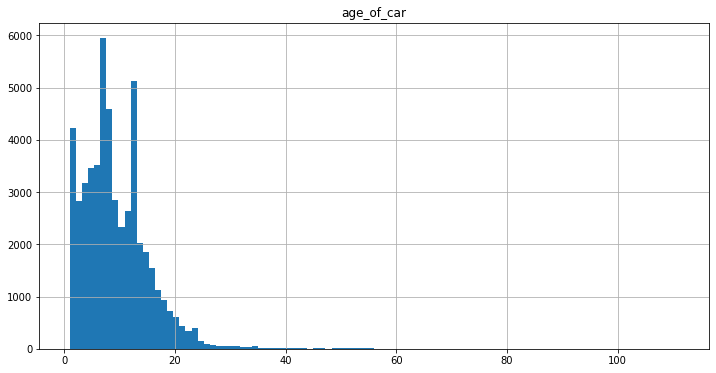

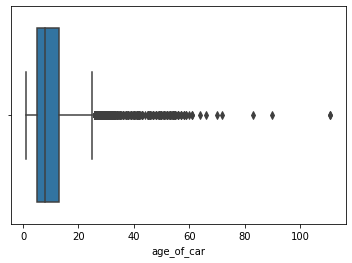

In [ ]:
# Membuat dan melihat histogram dan boxplot untuk outlier-nya pada kolom 'age_of_car'

p3.hist('age_of_car', bins=100, figsize=(12,6))
plt.show()
sns.boxplot(x='age_of_car', data=p3)
plt.show()

**Melihat Dari Boxplot dan Histogram bahwa pada kolom `age_of_car` memiliki nilai outlier yang sampai pada angka lebih dari 100 tahun (lebih tepatnya 110 tahun pada kolom describe yang merupakan nilai max). Nilai outliernya merupakan nilai positif yang artinya ini condong ke atas atau ke kanan. Pada disribusi data di histogram terbilang tidak normal karena bentuknya tidak mengikuti seharusnya, perlu pengecekan lebih dalam apakah nilai pada kategorinya sebenarnya memiliki outlier atau tidak.**

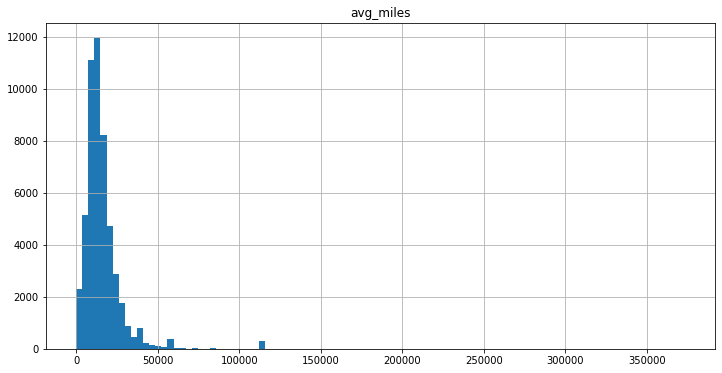

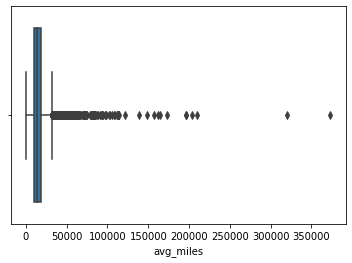

In [ ]:
# Membuat dan melihat histogram dan boxplot untuk outlier-nya pada kolom 'odometer'

p3.hist('avg_miles', bins=100, figsize=(12,6))
plt.show()
sns.boxplot(x='avg_miles', data=p3)
plt.show()

**Melihat Dari Boxplot dan Histogram bahwa pada kolom `avg_miles` memiliki nilai outlier yang lebih dari 350.000 (lebih tepatnya 373.200). Nilai outliernya merupakan nilai positif yang artinya ini condong ke atas atau ke kanan. Pada disribusi data di histogram walaupun normal, tetapi ada yang di curigai karena bentuknya yang terlalu kekanan dan ada juga beberapa tonjolan di atas 30.000 sampai 125.000. Perlu pengecekan lebih dalam apakah nilai pada kategorinya sebenarnya memiliki outlier atau tidak.**

In [ ]:
p3['avg_miles'].describe()

count     51525.000000
mean      15673.862503
std       12378.253203
min           0.000000
25%        9416.666667
50%       13387.714286
75%       18589.000000
max      373200.000000
Name: avg_miles, dtype: float64

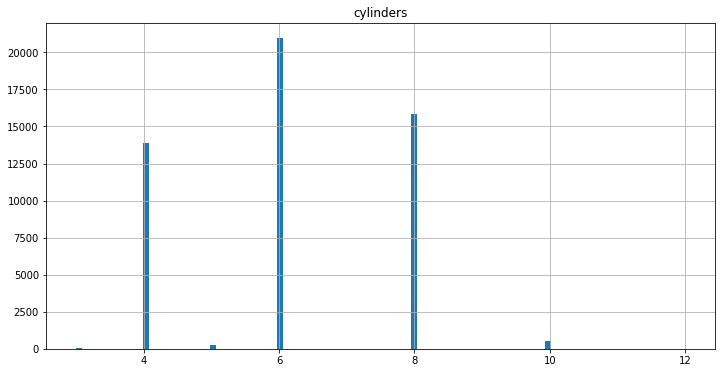

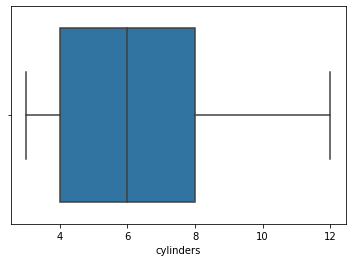

In [ ]:
# Membuat dan melihat histogram dan boxplot untuk outlier-nya pada kolom 'odometer'

p3.hist('cylinders', bins=100, figsize=(12,6))
plt.show()
sns.boxplot(x='cylinders', data=p3)
plt.show()

**Melihat Dari Boxplot dan Histogram bahwa pada kolom `cylinders` tidak memiliki nilai outlier, karena hal itu di buktikan dari boxplotnya. Tetapi, pada disribusi data di histogram terbilang tidak normal karena bentuknya tidak mengikuti seharusnya, perlu pengecekan lebih dalam apakah nilai pada kategorinya sebenarnya memiliki outlier atau tidak.**

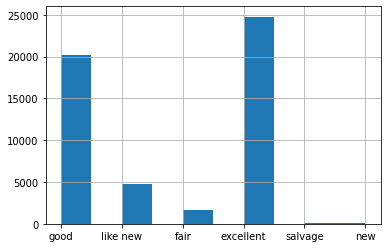

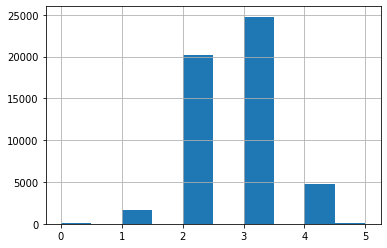

In [ ]:
# Membuat dan melihat histogram dan boxplot untuk outlier-nya pada kolom 'condition'
p3['condition'].hist()
plt.show()
p3['category_car'].sort_values().hist()
plt.show()

**Pada kolom `condition` tidak bisa di buat histogram secara baik karena nilai dalam kolom tersebut adalah string. Tetapi, karena untuk memanipulasi nilai string dalam kolom `category_car` yang di jadikan peringkat maka distribusinya bisa dibilang normal.**

**5 = New**

**4 = Like New**

**3 = Excellent**

**2 = Good**

**1 = Fair**

**0 = Salvage**

## Mempelajari dan Menangani Outlier

[Dengan hasil di atas, tentukan kolom apa yang mungkin berisi *outlier*, dan buatlah sebuah DataFrame tanpa *outlier* tersebut. Petunjuk: *Outlier* dapat diidentifikasi dengan menentukan batas bawah/atas untuk rentang nilai normal.]

In [ ]:
# Membuat fungsi untuk menghilangkan 
def remove_outlier_IQR(data, column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    data_new = data[~((data[column] < (Q1 - 1.5*IQR)) | (data[column] > (Q3 + 1.5*IQR)))]
    return data_new

In [ ]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
price_without_outlier = remove_outlier_IQR(data= p3, column= 'price')
avg_miles_without_outlier = remove_outlier_IQR(data= p3, column= 'avg_miles')
age_car_without_outlier = remove_outlier_IQR(data= p3, column= 'age_of_car')

## Mempelajari Parameter Inti Tanpa Outlier

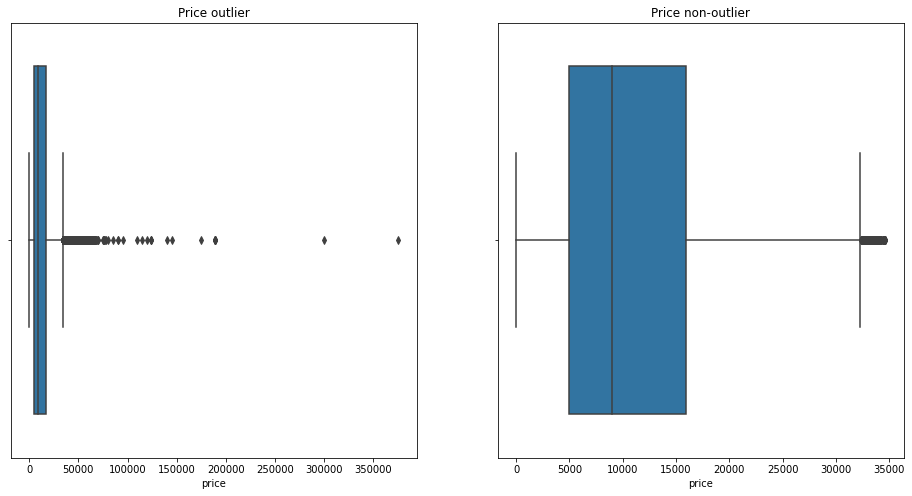

In [ ]:
# Membuat Perbandingan data sebelum dan sesudah dibersihkan nilai oulier pada kolom 'Price'
plt.figure(figsize= (16,8))
plt.subplot(1, 2, 1)
sns.boxplot(data=p3 , x='price')
plt.title('Price outlier')

plt.subplot(1, 2, 2)
sns.boxplot(data=price_without_outlier , x='price')
plt.title('Price non-outlier')
plt.show()

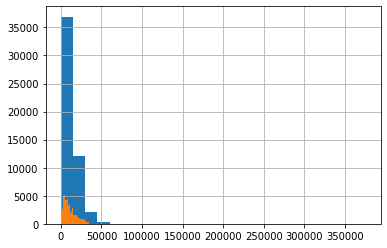

In [ ]:
p3['price'].hist(bins=25)
price_without_outlier['price'].hist(bins=25)
plt.show()

**Setelah melakukan perbandingan, bahwa terdapat perbedaan untuk kolom `price` yang sebelum dan sesudah difilter outliernya yaitu pada range-nya. Bahwa yang sebelum difilter range-nya sampai 375.000 sementara sesudah difilter hanya sampai 35.000 saja.**

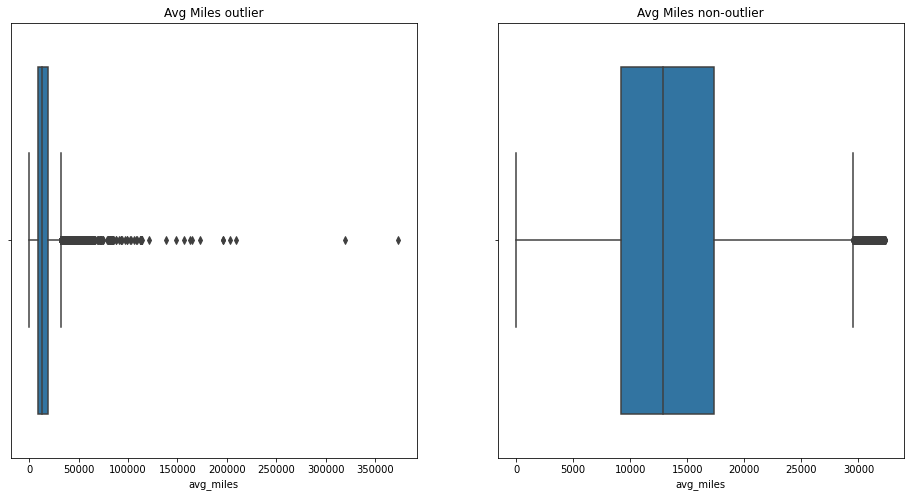

In [ ]:
# Membuat Perbandingan data sebelum dan sesudah dibersihkan nilai oulier pada kolom 'Avg_miles'
plt.figure(figsize= (16,8))
plt.subplot(1, 2, 1)
sns.boxplot(data=p3 , x='avg_miles')
plt.title('Avg Miles outlier')

plt.subplot(1, 2, 2)
sns.boxplot(data=avg_miles_without_outlier , x='avg_miles')
plt.title('Avg Miles non-outlier')
plt.show()

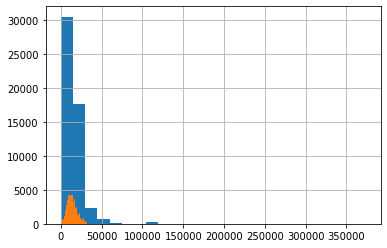

In [ ]:
p3['avg_miles'].hist(bins=25)
avg_miles_without_outlier['avg_miles'].hist(bins=25)
plt.show()

**Setelah melakukan perbandingan, bahwa terdapat perbedaan untuk kolom `avg_miles` yang sebelum dan sesudah difilter outliernya yaitu pada range-nya. Bahwa yang sebelum difilter range-nya sampai lebih 350.000 sementara sesudah difilter hanya sampai 30.000 saja.**

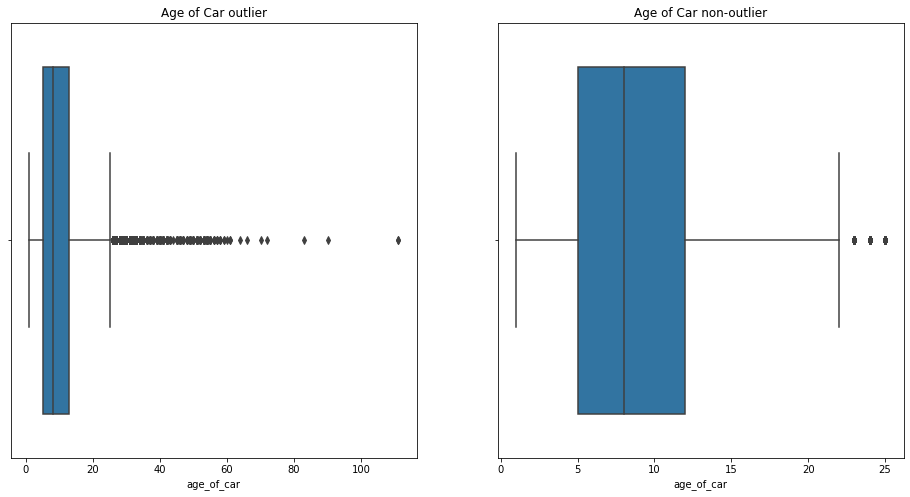

In [ ]:
# Membuat Perbandingan data sebelum dan sesudah dibersihkan nilai oulier pada kolom 'Age of Car'
plt.figure(figsize= (16,8))
plt.subplot(1, 2, 1)
sns.boxplot(data=p3 , x='age_of_car')
plt.title('Age of Car outlier')

plt.subplot(1, 2, 2)
sns.boxplot(data=age_car_without_outlier , x='age_of_car')
plt.title('Age of Car non-outlier')
plt.show()

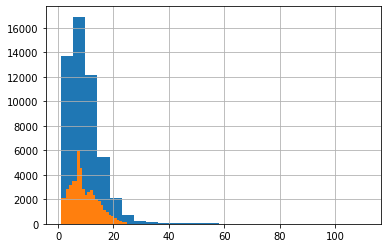

In [ ]:
p3['age_of_car'].hist(bins=25)
age_car_without_outlier['age_of_car'].hist(bins=25)
plt.show()

**Setelah melakukan perbandingan, bahwa terdapat perbedaan untuk kolom `age_of_car` yang sebelum dan sesudah difilter outliernya yaitu pada range-nya. Bahwa yang sebelum difilter range-nya sampai 100 tahun. Sementara sesudah difilter hanya sampai 25 tahun saja.**

## Masa Berlaku Iklan

In [ ]:
# Mengembalikan tipe data kolom 'days_listed' ke integer
p3['days_listed'] = p3['days_listed'].dt.days.astype(int)

In [ ]:
p3['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

In [ ]:
p3.loc[p3['days_listed']==0, 'type'].count()

54

In [ ]:
p3.loc[p3['days_listed']==0, 'type'].value_counts()

truck          14
sedan          13
SUV             8
pickup          6
hatchback       4
van             3
coupe           3
mini-van        2
convertible     1
Name: type, dtype: int64

In [ ]:
p3.loc[p3['days_listed']==271, 'type'].count()

1

In [ ]:
p3.loc[p3['days_listed']==271, 'type'].value_counts()

sedan    1
Name: type, dtype: int64

**Rata-rata dan Median pada iklan lama tayang adalah 39,5 dan 33. Artinya bahwa iklan penjualan kendaraan memiliki kisaran antara 33 hari(Paling cepat) sampai 39 hari(Paling lama) kurang lebih. Iklan tercepat di hapus yaitu kurang dari 1 hari. Dan yang paling terlama yaitu selama 271 hari.**

## Harga Rata-Rata Setiap Jenis Kendaraan

[Lakukan analisis terhadap jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan. Buatlah grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan. Pilih dua jenis kendaraan dengan jumlah iklan yang paling banyak.]

In [ ]:
price_type_car = price_without_outlier.pivot_table(index='type', values= 'price', 
                                        aggfunc=['mean', 'count']).reset_index()
price_type_car.columns = ['tipe_kendaraan', 'harga rata-rata', 'jumlah']
price_type_car.sort_values('jumlah',ascending=False)

,tipe_kendaraan,harga rata-rata,jumlah
9,sedan,6942.349551,12147
0,SUV,10359.897968,12104
10,truck,14820.840606,11550
8,pickup,14609.742072,6622
3,coupe,13269.010782,2226
12,wagon,8880.496408,1531
5,mini-van,8004.687986,1157
4,hatchback,6841.620459,1046
11,van,8743.340102,591
2,convertible,12511.617021,423


**Kendaraan terbanyak yang diiklankan yaitu sedan dengan jumlah 12147 iklan dan harga pada umumnya sekitar 6942. yang kaedua yaitu SUV dengan jumlah 12104 iklan dan harga pada umumnya sekitar 10359. Dan iklan terdikit pada kendaraan bus dengan jumlah 24 iklan dan harga pada umumnya sekitar 17135.**

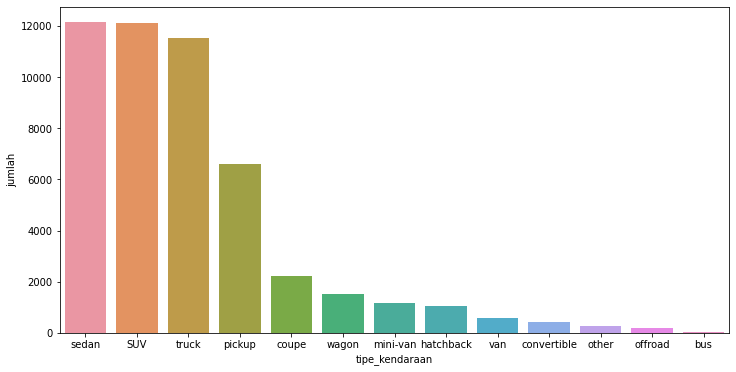

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=price_type_car, x='tipe_kendaraan', y='jumlah',
           order=price_type_car.sort_values('jumlah', ascending=False).tipe_kendaraan)
plt.show()

**Jumlah Kendaraan yang diiklankan paling banyak yaitu sedan dan SUV pada tabel diatas.**

## Faktor Harga

In [ ]:
# Membuat varibael baru untuk tipe kendaraan hanya sedan dan SUV
corr_sedan_suv = p3[['type', 'price', 'age_of_car', 'avg_miles', 'condition', 'category_car','transmission', 'paint_color']].query("type == ['sedan', 'SUV']")
corr_sedan_suv

,type,price,age_of_car,avg_miles,condition,category_car,transmission,paint_color
0,SUV,9400,8,18125.000000,good,2,automatic,others
2,sedan,5500,7,15714.285714,like new,4,automatic,red
4,sedan,14900,3,26967.666667,excellent,3,automatic,black
5,sedan,14990,5,11590.800000,excellent,3,automatic,black
6,sedan,12990,4,19803.000000,excellent,3,automatic,white
...,...,...,...,...,...,...,...,...
51520,sedan,9249,6,14689.333333,like new,4,automatic,black
51521,sedan,2700,17,10676.470588,salvage,0,automatic,white
51522,sedan,3950,10,12800.000000,excellent,3,automatic,blue
51523,sedan,7455,6,23262.166667,good,2,automatic,black


**Melihat tabel untuk menganalisa faktor harga bahwa kolom yang memiliki kelompok numerikal hanya 3 kolom saja. Yaitu: `price`, `age_of_car`, `odometer`, dan `category_car`. Jadi untuk selain 4 kolom itu maka di buat boxplot untuk kategorikal.**

In [ ]:
# Mengecek masing-masing nilai value
corr_sedan_suv['transmission'].value_counts()

automatic    23156
manual        1111
other          292
Name: transmission, dtype: int64

In [ ]:
# Mengecek masing-masing nilai value
corr_sedan_suv['paint_color'].value_counts()

others    4425
black     3990
silver    3614
white     3472
grey      2806
blue      2286
red       1851
green      645
brown      628
custom     611
orange      93
yellow      73
purple      65
Name: paint_color, dtype: int64

In [ ]:
# Mengecek masing-masing nilai value
corr_sedan_suv['condition'].value_counts()

excellent    12698
good          8625
like new      2475
fair           632
new             68
salvage         61
Name: condition, dtype: int64

**Syarat untuk kategorikal bahwa iklan baik dari kolom transmisi, warna, dan kondisi mobil memiliki iklan masing-masing pada nilainya lebih dari 50. Jadi syarat ini terpenuhi untuk di buat boxplot agar valid saat di analisis.**

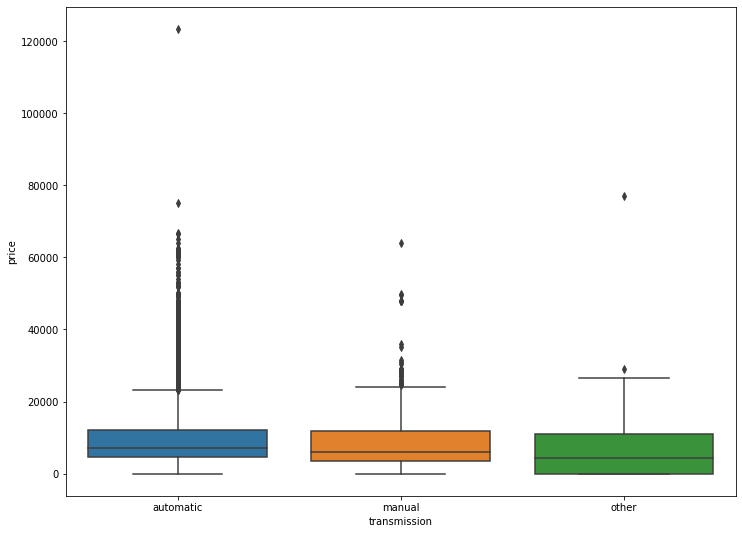

In [ ]:
plt.figure(figsize= (12,9))
sns.boxplot(data=corr_sedan_suv , x='transmission', y='price')
plt.show()

**Faktor harga untuk transmisi bahwa mobil yang mempunyai transmisi auto harganya lebih tinggi dari pada kategori yang lainnya.**

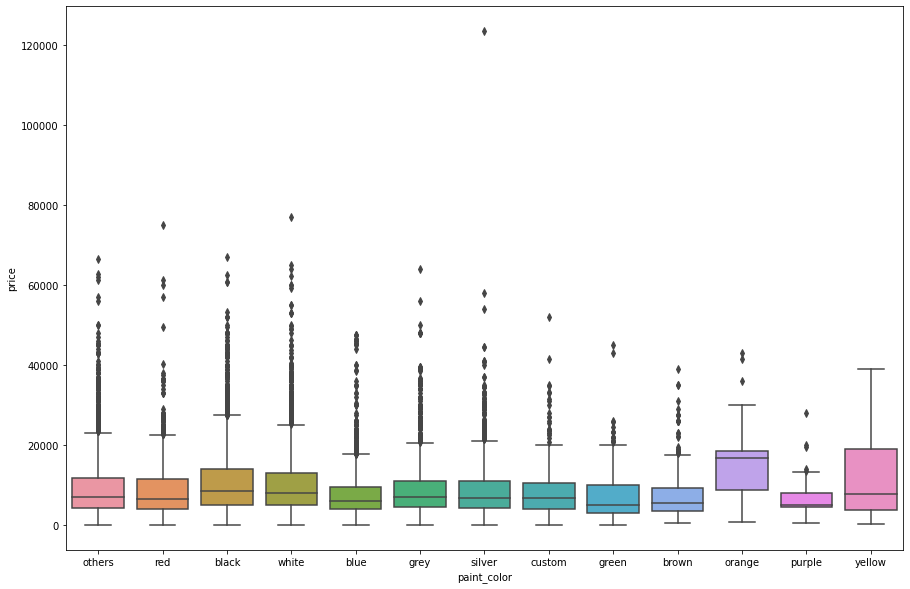

In [ ]:
plt.figure(figsize= (15,10))
sns.boxplot(data=corr_sedan_suv , x='paint_color', y='price')
plt.show()

**Faktor harga pada warna bahwa warna-warna yang tidak umum atau jarang terlihat mempunyai harga yang lebih besar dibanding warna-warna yang sudah sering dijumpai di jalan pada umumnya. Mempunyai nilai di luar distribusi bisa jadi ada faktor lain seperti jenis tipe mobil/SUV, jarak, dan umur.**

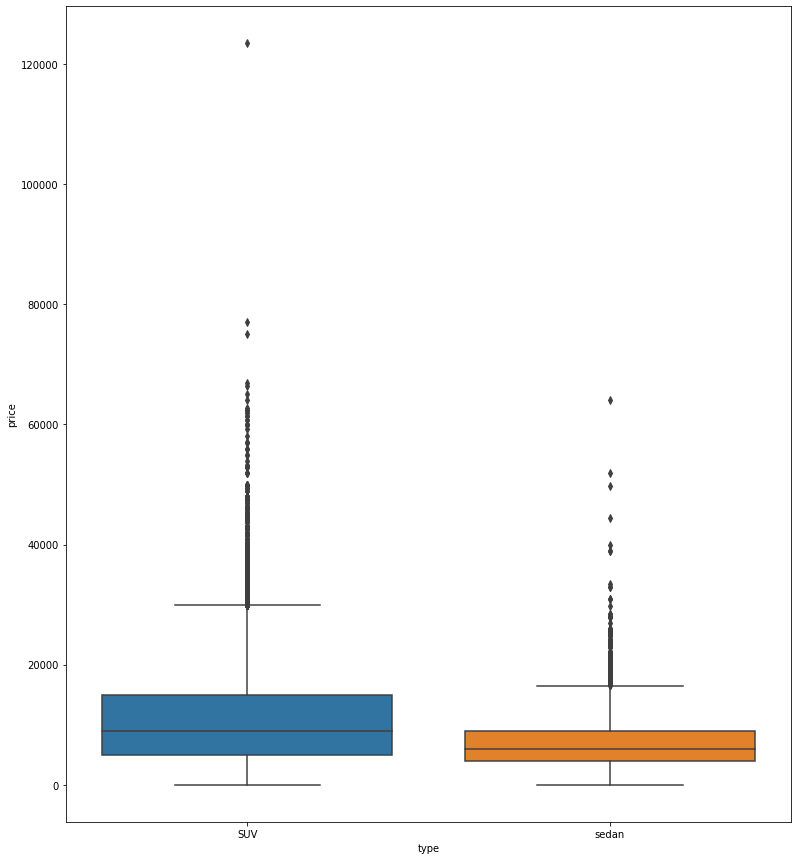

In [ ]:
plt.figure(figsize= (13,15))
sns.boxplot(data=corr_sedan_suv , x='type', y='price')
plt.show()

**Faktor harga pada tipe mobil bahwa SUV memiliki faktor penentu untuk harga lebih tinggi dibanding sedan. Hal ini bisa jadi karena beberapa faktor seperti harga dealer, tahun, dan model, jarak, dan usia mobil.**

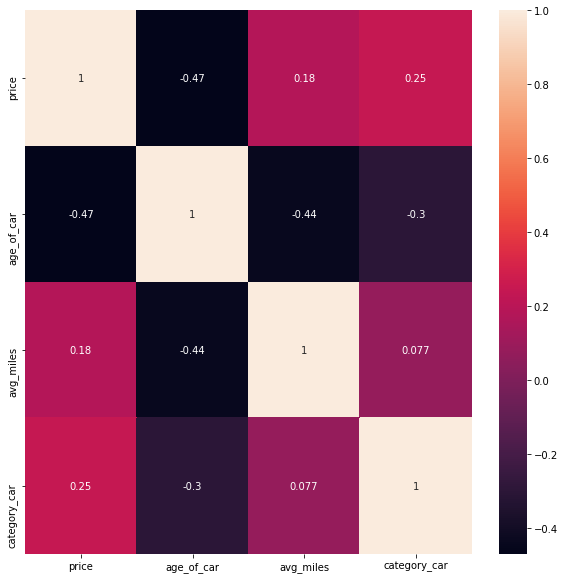

In [ ]:
plt.figure(figsize=(10,10))
corr_sedan_suv.corr()
sns.heatmap(corr_sedan_suv.corr(), annot=True)
plt.show()

In [ ]:
corr_sedan_suv.corr()

,price,age_of_car,avg_miles,category_car
price,1.000000,-0.469825,0.179050,0.247239
age_of_car,-0.469825,1.000000,-0.436812,-0.301563
avg_miles,0.179050,-0.436812,1.000000,0.076535
category_car,0.247239,-0.301563,0.076535,1.000000


**Melihat secara keseluruhan bahwa `price` memiliki kolerasi koefisien negatif terhadap `age_of_car` & `odometer`, tetapi memiliki kolerasi positif terhadap `category_car` berdasarkan kondisinya.**

**Melihat secara keseluruhan bahwa `age_of_car` memiliki kolerasi koefisien positif terhadap `odometer`.**

**Melihat secara keseluruhan bahwa `age_of_car` memiliki kolerasi koefisien negatif terhadap `category_car` berdasarkan kondisinya.**

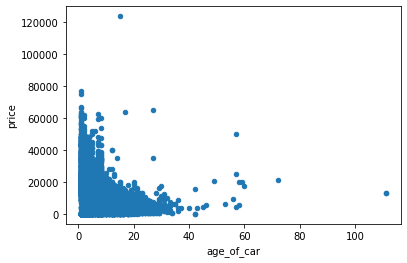

In [ ]:
corr_sedan_suv.plot(x='age_of_car', y='price', kind='scatter')
plt.show()

**Melihat pola bahwa `age_of_car` terhadap `price` memiliki koefisien negatif (serong kiri) bahwa ketika umur mobil yang diiklankan semakin tua, maka harga mobil yang diiklan akan semakin murah.**

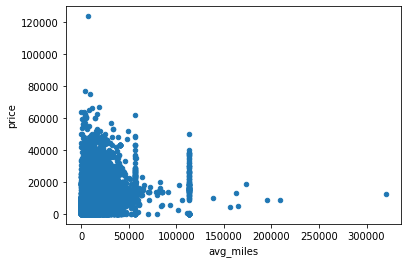

In [ ]:
corr_sedan_suv.plot(x='avg_miles', y='price', kind='scatter')
plt.show()

**Melihat pola bahwa `odometer` terhadap `price` memiliki koefisien negatif (serong kiri) bahwa ketika jarak mobil yang diiklankan semakin besar/jauh, maka harga mobil yang diiklan akan semakin murah.**

## Kesimpulan Umum

**Dalam menganalisa data saya menggunakan info, describe dan meliaht semua nilai value dengan value_counts untuk masing-masing kolom. Ketika ada nilai yang hilang saya mengecek dengan .loc untuk tujuan apakah nilai yang hilang mempunyai pola atau tidak. Lalu memperbaiki data dengan nilai median untuk mencegah merusak data karena nilai ekstrim pada describe. Memperbaiki tipe data agar bisa menggunakan di proses selanjutnya.**

**Melihat dan mengcek distribusi dan outlier menggukana Histogram dan Boxplot. Menghilangkan nilai outlier dengan IQR, Q3 (Batas Atas), Q1 (Batas Bawah) lalu dibuat variabel baru untuk proses selanjutnya. Mengecek kembali perbandingan sebelum difilter dan sesudah difilter outliernya.**